In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import cv2

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%matplotlib inline

# Часть 1: Свертки

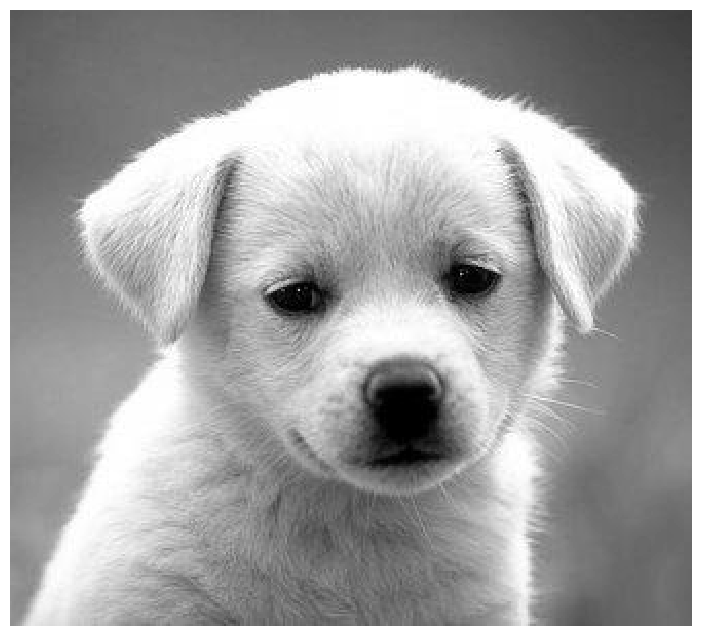

In [3]:
# Open image as grayscale
img = cv2.imread('/content/img/dog.jpg', 0)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
def conv_nested(image, kernel):
    """A naive implementation of convolution filter.

    This is a naive implementation of convolution using 4 nested for-loops.
    This function computes convolution of an image with a kernel and outputs
    the result that has the same shape as the input image.

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    image = np.pad(image, Hk // 2)

    for i in range(Hi):
        for j in range(Wi):
            for ki in range(Hk):
                for kj in range(Wk):
                    ii = i + ki
                    jj = j + kj

                    out[i, j] += image[ii, jj] * kernel[Hk - 1 - ki, Wk - 1 - kj]

    return out


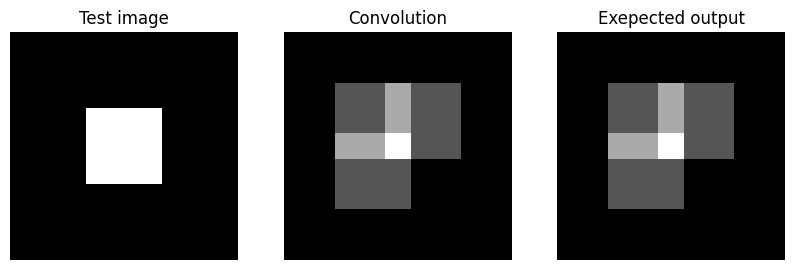

In [5]:
# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

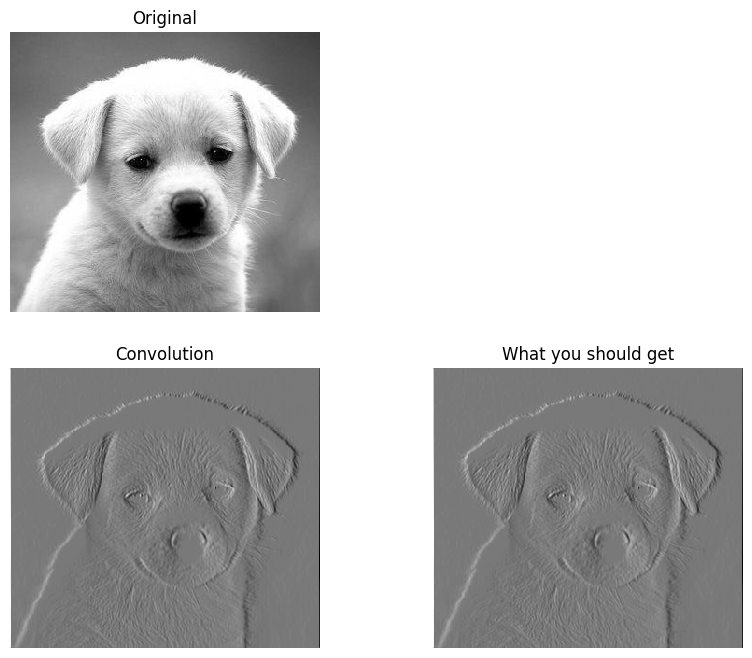

In [6]:
# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)
# out = cv2.filter2D(img, -1, kernel)

# Plot original image
plt.subplot(221), plt.imshow(img), plt.title('Original'), plt.axis('off')

# Plot your convolved image
plt.subplot(223), plt.imshow(out), plt.title('Convolution'), plt.axis('off')

# Plot what you should get
solution_img = cv2.imread('img/convoluted_dog.jpg', 0)
plt.subplot(224), plt.imshow(solution_img), plt.title('What you should get'), plt.axis('off')

plt.show()

In [7]:
out, solution_img

(array([[ 265.,   -3.,   -1., ...,    0.,   -3., -183.],
        [ 355.,   -4.,   -2., ...,    0.,   -3., -244.],
        [ 357.,   -3.,   -1., ...,   -1.,   -2., -244.],
        ...,
        [ 576.,    4.,   18., ...,    0.,   -4., -412.],
        [ 577.,   12.,   32., ...,    0.,   -4., -412.],
        [ 434.,   13.,   29., ...,    0.,   -3., -309.]]),
 array([[179, 121, 121, ..., 121, 121,  81],
        [199, 120, 121, ..., 121, 121,  68],
        [200, 121, 121, ..., 121, 121,  68],
        ...,
        [248, 121, 125, ..., 121, 120,  31],
        [248, 124, 128, ..., 121, 120,  31],
        [216, 124, 128, ..., 121, 121,  54]], dtype=uint8))

In [8]:
def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).

    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    # Инициализация массива, заполненного нулями
    out = np.zeros((H + 2 * pad_height, W + 2 * pad_width))

    # Вставляем оригинальное изображение в центр нового массива
    out[pad_height:pad_height + H, pad_width:pad_width + W] = image

    return out


(380, 372)


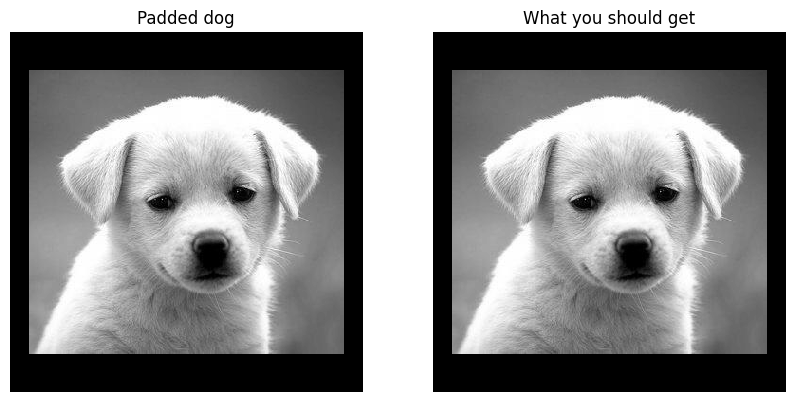

In [9]:
pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)
print(padded_img.shape)


# Plot your padded dog
plt.subplot(121), plt.imshow(padded_img), plt.title('Padded dog'), plt.axis('off')

# Plot what you should get
solution_img = cv2.imread('img/padded_dog.jpg', 0)
plt.subplot(122), plt.imshow(solution_img), plt.title('What you should get'), plt.axis('off')

plt.show()

In [10]:
def conv_fast(image, kernel):
    """ An efficient implementation of convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute weighted sum of neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - There should be two nested for-loops
        - You may find np.flip() and np.sum() useful

    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    img_pad = zero_pad(image, Hk // 2, Wk // 2)
    kernel = np.flip(kernel)

    for i in range(Hi):
        for j in range(Wi):
            out[i, j] = np.sum(img_pad[i:i + Hk, j:j + Wk] * kernel)

    return out

conv_nested: took 1.097050 seconds.
conv_fast: took 0.747523 seconds.


(-0.5, 331.5, 299.5, -0.5)

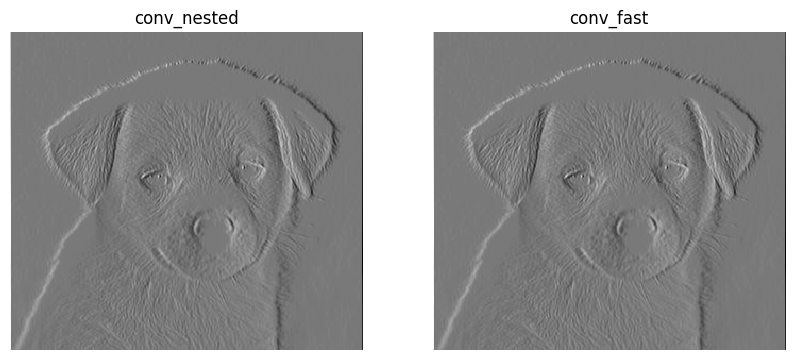

In [11]:
t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

In [12]:
import torch

import torch.nn.functional as F
import numpy as np

def conv_faster(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).

    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    # Convert numpy arrays to PyTorch tensors
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # # Perform convolution using PyTorch's F.conv2d
    out_tensor = F.conv2d(image_tensor, kernel_tensor, padding=(kernel.shape[0] // 2, kernel.shape[1] // 2))

    # # Convert the result back to a numpy array
    out = out_tensor.squeeze(0).squeeze(0).numpy()

    return out

conv_fast: took 1.251896 seconds.
conv_faster: took 0.235738 seconds.


(-0.5, 331.5, 299.5, -0.5)

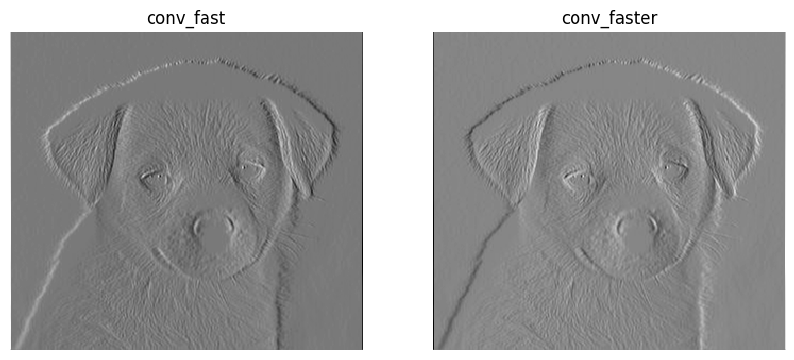

In [13]:
t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_faster = conv_faster(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_fast: took %f seconds." % (t1 - t0))
print("conv_faster: took %f seconds." % (t2 - t1))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_faster)
plt.title('conv_faster')
plt.axis('off')


# Часть 2: Кросс-корреляция

In [14]:
# Load template and image in grayscale
img = cv2.imread('img/shelf.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey = cv2.imread('img/shelf.jpg', 0)
temp = cv2.imread('img/template.jpg')
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
temp_grey = cv2.imread('img/template.jpg', 0)

In [15]:
def cross_correlation(f, g):
    """ Cross-correlation of f and g.

    Hint: use the conv_fast function defined above.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    Hf, Wf = f.shape
    Hg, Wg = g.shape

    out = np.zeros((Hf, Wf))

    img_pad = zero_pad(f, Hg // 2, Wg // 2)

    kernel_sum_of_squares = np.sum(g ** 2)

    for i in range(Hf):
        for j in range(Wf):
            img_slice = img_pad[i:i + Hg, j:j + Wg]

            norm_coeff = np.sqrt(kernel_sum_of_squares * np.sum(img_slice ** 2))

            out[i, j] = np.sum(img_slice * g) / norm_coeff if norm_coeff != 0 else 0

    return out

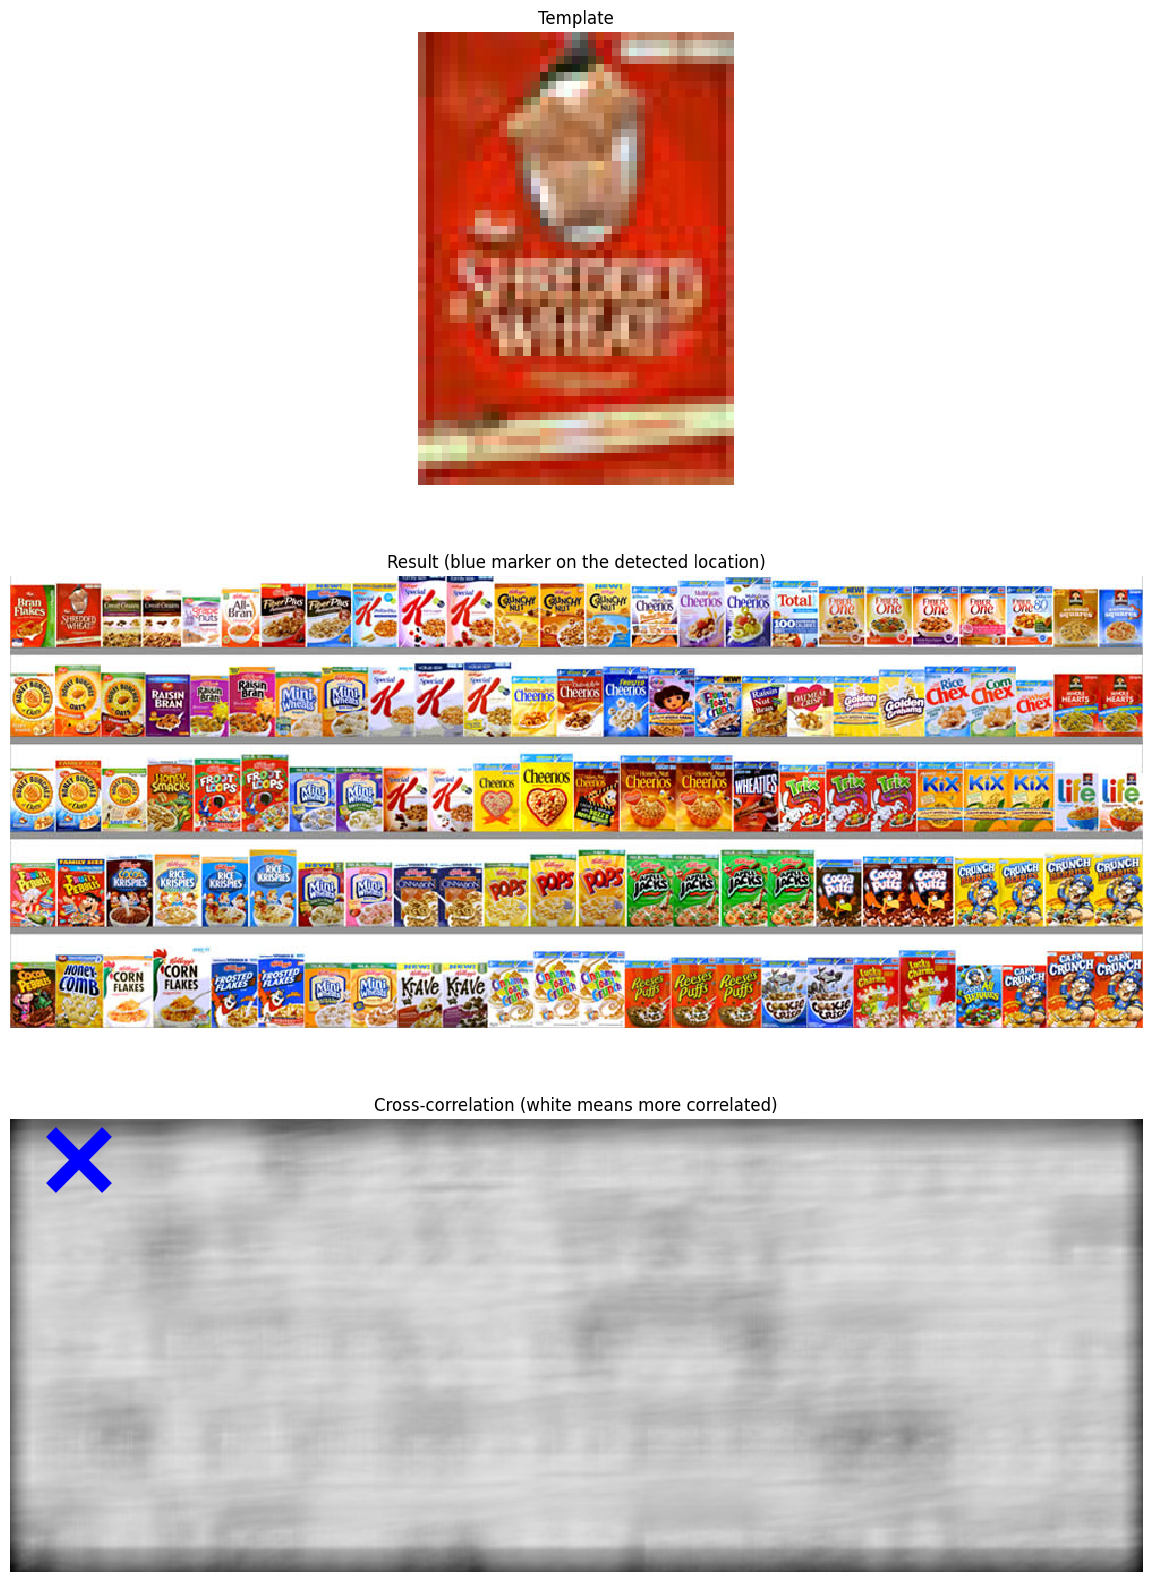

In [16]:
# Perform cross-correlation between the image and the template
out = cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)


plt.figure(figsize=(25, 20))

# Display product template
plt.subplot(311), plt.imshow(temp), plt.title('Template'), plt.axis('off')

# Display image
plt.subplot(312), plt.imshow(img), plt.title('Result (blue marker on the detected location)'), plt.axis('off')

# Display cross-correlation output
plt.subplot(313), plt.imshow(out), plt.title('Cross-correlation (white means more correlated)'), plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)

plt.show()

In [17]:
def zero_mean_cross_correlation(f, g):
    """ Zero-mean cross-correlation of f and g.

    Subtract the mean of g from g so that its mean becomes zero.

    Hint: you should look up useful numpy functions online for calculating the mean.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    temp = g - np.mean(g)
    out = cross_correlation(f, temp)

    return out


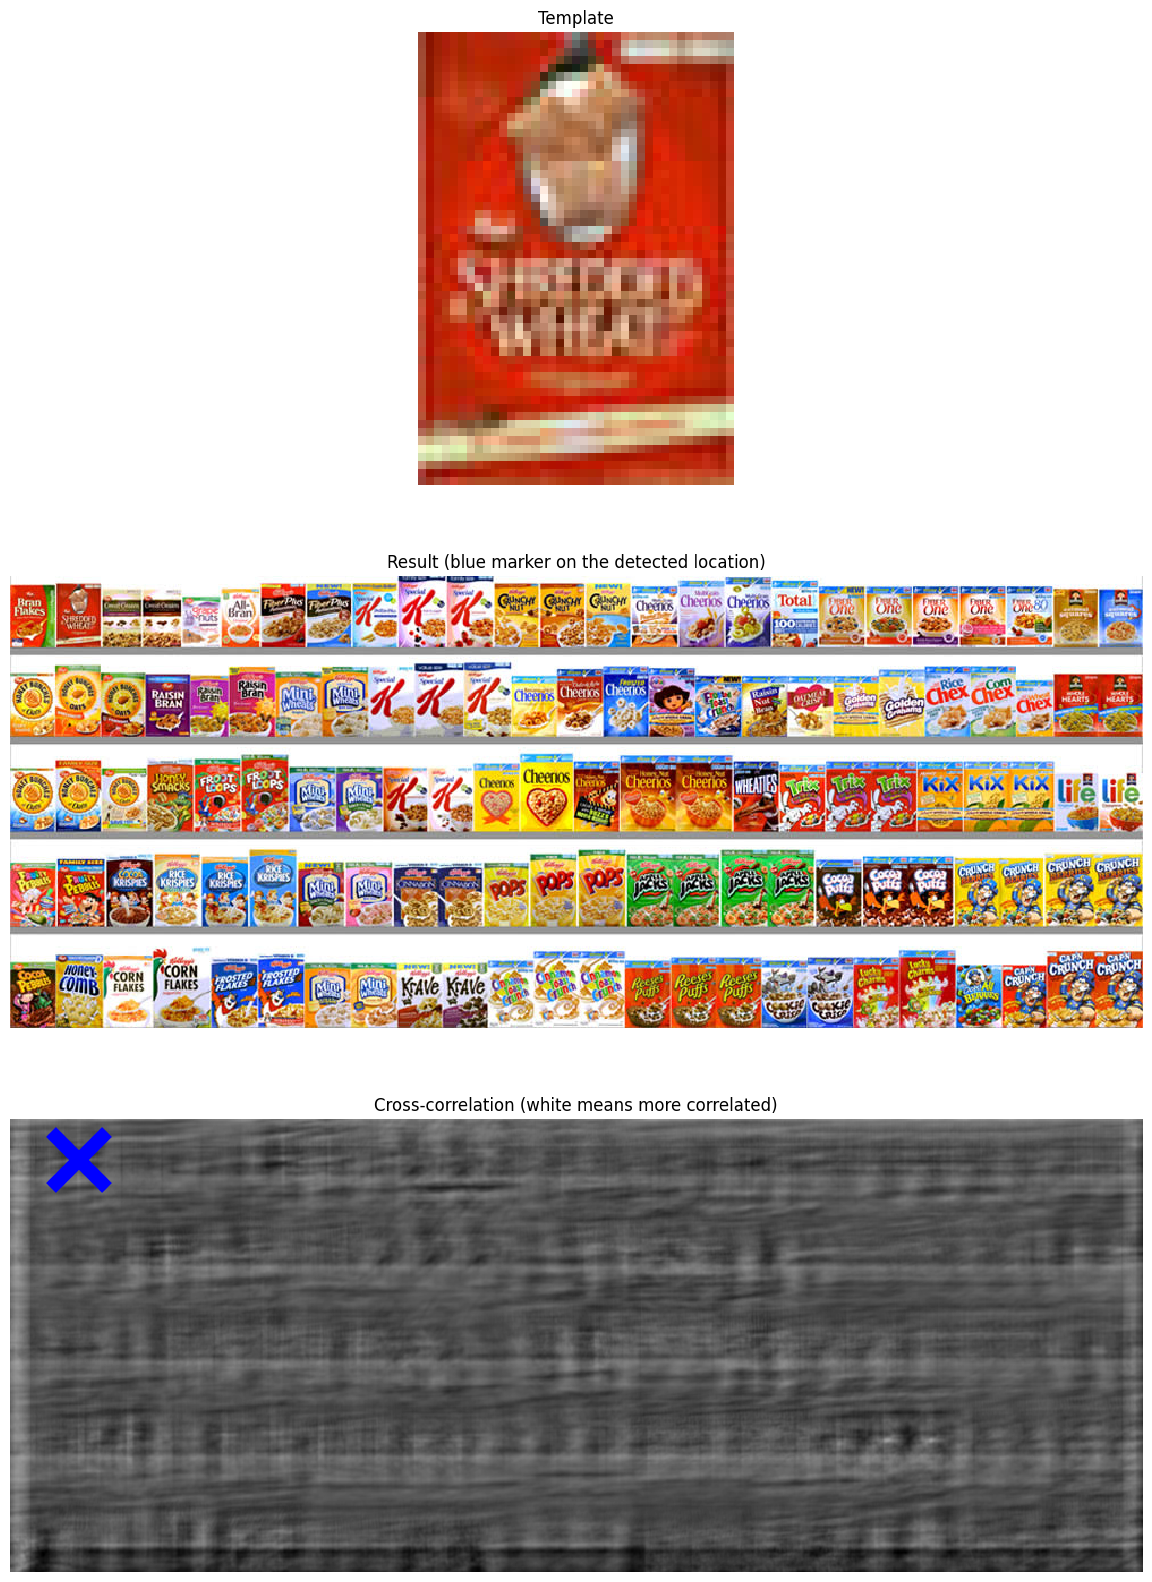

In [18]:
# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)


plt.figure(figsize=(30, 20))

# Display product template
plt.subplot(311), plt.imshow(temp), plt.title('Template'), plt.axis('off')

# Display image
plt.subplot(312), plt.imshow(img), plt.title('Result (blue marker on the detected location)'), plt.axis('off')

# Display cross-correlation output
plt.subplot(313), plt.imshow(out), plt.title('Cross-correlation (white means more correlated)'), plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'bx', ms=40, mew=10)

plt.show()

In [22]:
def check_product_on_shelf(shelf, product):
    out = zero_mean_cross_correlation(shelf, product)

    # Scale output by the size of the template
    out = out / float(product.shape[0] * product.shape[1])

    # Threshold output (this is arbitrary, you would need to tune the threshold for a real application)
    out = out > 0.025

    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')

In [23]:
# Load image of the shelf without the product
img2 = cv2.imread('img/shelf_soldout.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_grey = cv2.imread('img/shelf_soldout.jpg', 0)

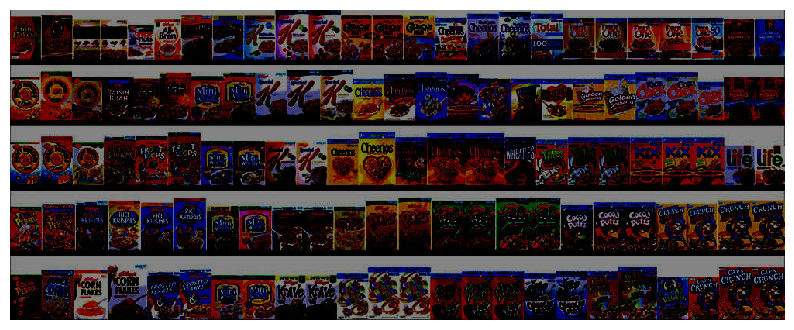

The product is not on the shelf


In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(img), plt.axis('off'), plt.show()
check_product_on_shelf(img_grey, temp_grey)

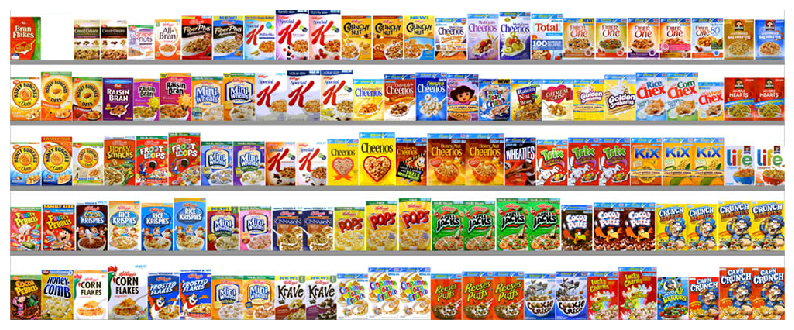

The product is not on the shelf


In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(img2), plt.axis('off'), plt.show()
check_product_on_shelf(img2_grey, temp_grey)

In [19]:
def normalized_cross_correlation(f, g):
    """ Normalized cross-correlation of f and g.

    Normalize the subimage of f and the template g at each step
    before computing the weighted sum of the two.

    Hint: you should look up useful numpy functions online for calculating
          the mean and standard deviation.

    Args:
        f: numpy array of shape (Hf, Wf).
        g: numpy array of shape (Hg, Wg).

    Returns:
        out: numpy array of shape (Hf, Wf).
    """

    g = g.astype(np.float64)
    f = f.astype(np.float64)

    Hf, Wf = f.shape
    Hg, Wg = g.shape

    out = np.zeros((Hf, Wf))

    img_pad = zero_pad(f, Hg // 2, Wg // 2)

    g_std = np.std(g)
    g_mean = np.mean(g)
    g_norm = (g - g_mean) / g_std
    g_sum_sq = np.sum(g ** 2)

    for i in range(Hf):
        for j in range(Wf):
            img_slice = img_pad[i:i + Hg, j:j + Wg]

            img_slice_mean = np.mean(img_slice)
            img_slice_std = np.std(img_slice)
            img_slice_sum_sq = np.sum(img_slice ** 2)

            coeff = np.sqrt(g_sum_sq * img_slice_sum_sq)

            out[i, j] = np.sum(((img_slice - img_slice_mean) / img_slice_std) * g_norm) / coeff

    return out


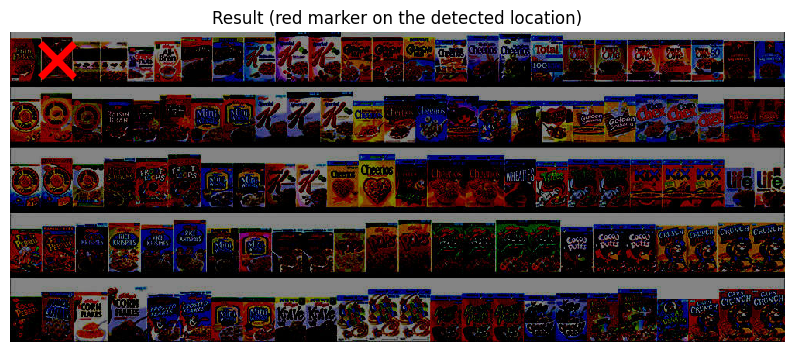

In [20]:
# Load image
img = cv2.imread('img/shelf_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey = cv2.imread('img/shelf_dark.jpg', 0)

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)


plt.figure(figsize=(10, 5))

# Display image
plt.imshow(img), plt.title('Result (red marker on the detected location)'), plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

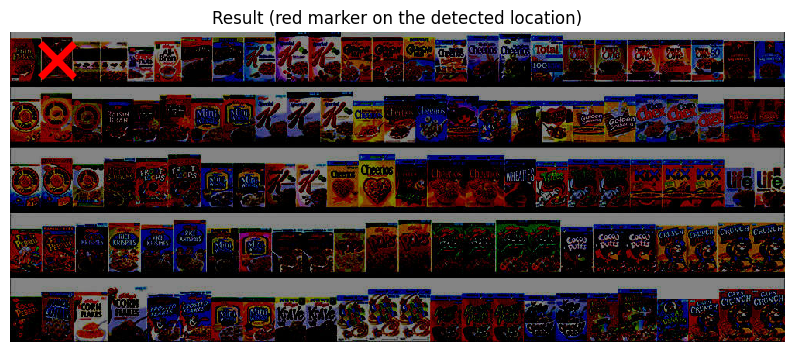

In [21]:
# Perform normalized cross-correlation between the image and the template
out = normalized_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)


plt.figure(figsize=(10, 5))

# Display image
plt.imshow(img), plt.title('Result (red marker on the detected location)'), plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()